<a href="https://colab.research.google.com/github/sinanazeri/Classification-with-pre-trained-transformers/blob/main/TabPFNDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In order to get the fastest predictions you need to enable GPUs for the notebook:**
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down
(https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=oM_8ELnJq_wd)

In [1]:
!pip install tabpfn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 1.5 MB/s eta 0:00:00


In [2]:
import numpy as np
from pathlib import Path
import pandas as pd
import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

from tabpfn import TabPFNClassifier

The `load_breast_cancer` dataset from scikit-learn doesn't actually contain image data. Instead, it consists of numerical features extracted from images of fine needle aspirate (FNA) of breast masses. These features are computed measurements that describe characteristics of the cell nuclei present in the images.

In [3]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
print("X.shape: ", X.shape)
print(X[0])

X.shape:  (569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [13]:
import numpy as np

# Assuming y is your numpy array
unique, counts = np.unique(y, return_counts=True)
value_counts = dict(zip(unique, counts))

print(value_counts)

{0: 212, 1: 357}


In [9]:
# N_ensemble_configurations defines how many estimators are averaged, it is bounded by #features * #classes
# more ensemble members are slower, but more accurate
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

We have to download the TabPFN, as there is no checkpoint at  /usr/local/lib/python3.10/dist-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [14]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

Prediction time:  2.6393449306488037 Accuracy 0.9840425531914894


In [15]:
# We also offer the `predict_proba` interface
classifier.predict_proba(X_test).shape

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


(188, 2)

In [16]:
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,prediction
0,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875,1 (p=0.94)
1,18.94,21.31,123.6,1130.0,0.09009,0.1029,0.108,0.07951,0.1582,0.05461,...,26.58,165.9,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589,0 (p=1.00)
2,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,...,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,0 (p=1.00)
3,12.4,17.68,81.47,467.8,0.1054,0.1316,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.145,0.2629,0.2403,0.0737,0.2556,0.09359,1 (p=1.00)
4,11.54,14.44,74.65,402.9,0.09984,0.112,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1 (p=1.00)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,16.11,18.05,105.1,813.0,0.09721,0.1137,0.09447,0.05943,0.1861,0.06248,...,25.27,129.0,1233.0,0.1314,0.2236,0.2802,0.1216,0.2792,0.08158,0 (p=1.00)
184,18.49,17.52,121.3,1068.0,0.1012,0.1317,0.1491,0.09183,0.1832,0.06697,...,22.88,146.4,1600.0,0.1412,0.3089,0.3533,0.1663,0.251,0.09445,0 (p=1.00)
185,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,...,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,0 (p=0.98)
186,14.47,24.99,95.81,656.4,0.08837,0.123,0.1009,0.0389,0.1872,0.06341,...,31.73,113.5,808.9,0.134,0.4202,0.404,0.1205,0.3187,0.1023,0 (p=0.64)


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: AP

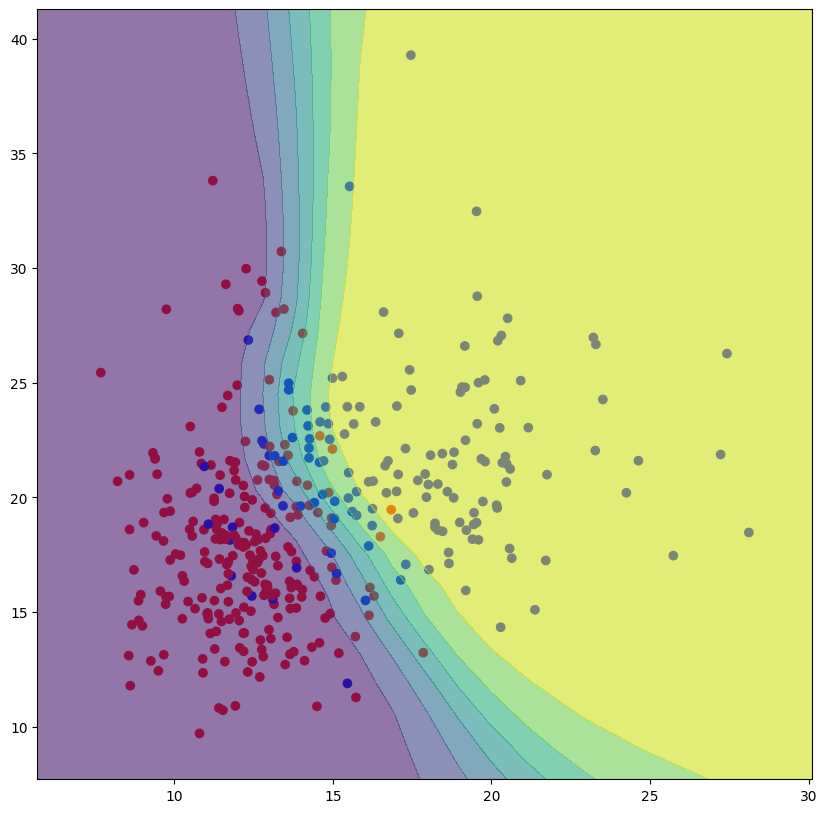

In [17]:
# PLOTTING
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot the training points
vfunc = np.vectorize(lambda x : np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)
y_train_index = y_train_index == 0

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

classifier.fit(X_train[:, 0:2], y_train_index)

DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="predict_proba"
)

## Try it on Iris

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Prediction time:  0.1655728816986084 Accuracy 0.98


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


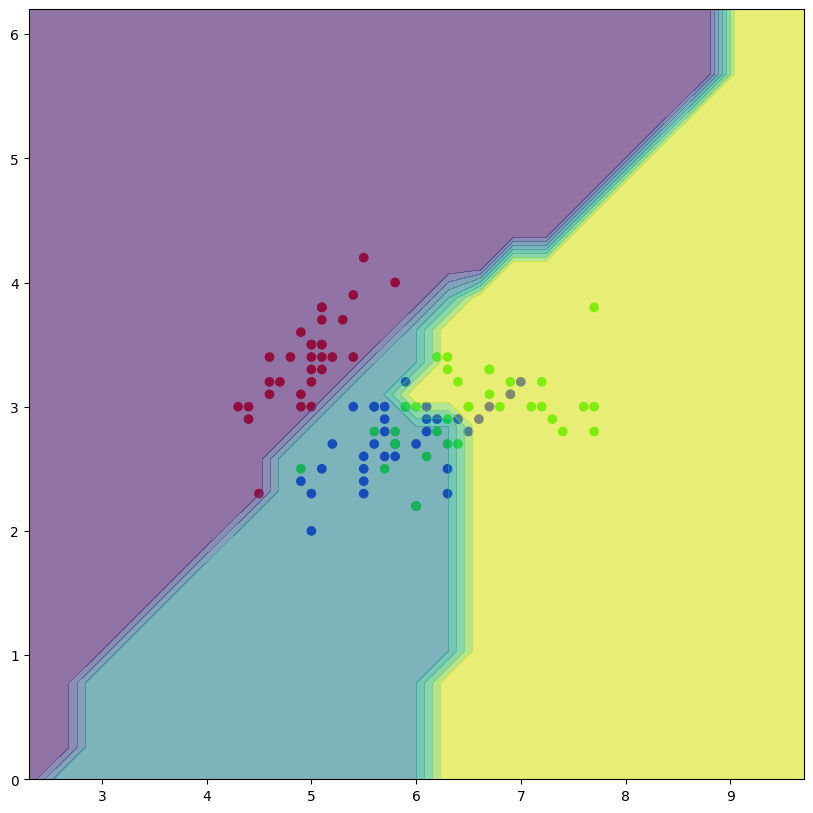

In [19]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay
from tabpfn import TabPFNClassifier

# Load Iris dataset
X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize and train the TabPFN classifier
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)
start = time.time()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))
classifier.predict_proba(X_test).shape
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

# PLOTTING
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF", "#00FF00"])

# Plot the training points
vfunc = np.vectorize(lambda x: np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)

# Select only two features for visualization (e.g., sepal length and sepal width)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

# Refit classifier for two features only (for visualization)
classifier.fit(X_train[:, 0:2], y_train)

# Display decision boundary
DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="auto"
)
plt.show()


## Test on Titanic

In [21]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay
from tabpfn import TabPFNClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Titanic dataset
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Preprocessing
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Drop columns if they exist in the dataset
columns_to_drop = ['Name', 'Ticket', 'Cabin']
for col in columns_to_drop:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

# Convert categorical data to numerical data
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize and train the TabPFN classifier
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)
start = time.time()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))
classifier.predict_proba(X_test).shape
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table


Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Prediction time:  0.23771333694458008 Accuracy 0.7986348122866894


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,prediction
296,1,1,47.0,0,0,30.5,0 (p=0.79)
682,2,1,25.0,1,2,41.5792,0 (p=0.88)
535,3,1,69.0,0,0,14.5,0 (p=0.97)
644,1,1,56.0,0,0,35.5,0 (p=0.90)
623,2,1,57.0,0,0,12.35,0 (p=0.93)
...,...,...,...,...,...,...,...
377,3,1,19.0,0,0,7.775,0 (p=0.91)
140,3,0,22.0,0,0,7.75,1 (p=0.65)
173,1,1,56.0,0,0,30.6958,0 (p=0.87)
6,1,1,54.0,0,0,51.8625,0 (p=0.91)


Let's compare with other classifiers

In [24]:
!pip install xgboost scikit-learn pandas numpy matplotlib catboost -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.6 MB/s eta 0:00:00


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

# Load and preprocess the Titanic dataset
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore', inplace=True)

# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier(max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)  # Set verbose to 0 to avoid lengthy output
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

# Display results
for name, accuracy in results.items():
    print(f"{name} Accuracy: {accuracy:.4f}")

# TabPFN classifier should be evaluated separately as shown in the previous script


Random Forest Accuracy: 0.7816
SVM Accuracy: 0.6587
XGBoost Accuracy: 0.8055
Gradient Boosting Accuracy: 0.8294
Logistic Regression Accuracy: 0.7782
KNN Accuracy: 0.6997
Decision Tree Accuracy: 0.7713
Naive Bayes Accuracy: 0.7645
MLP Neural Network Accuracy: 0.8020
AdaBoost Accuracy: 0.8020
CatBoost Accuracy: 0.8294


Let's ensemble them

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Add your code to import and configure the TabPFNClassifier here

# Load and preprocess the Titanic dataset
# [Your existing data loading and preprocessing code here]

# Define features and target
# [Your existing feature and target definition code here]

# Split the dataset
# [Your existing dataset splitting code here]

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier(max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}


# Initialize and train the TabPFN classifier
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)
classifier.fit(X_train, y_train)

# Predict probabilities with TabPFN
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('TabPFN Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

# Ensemble
# Initialize an array to store the sum of probabilities from all models
probabilities_sum = np.zeros((len(y_test), 2))  # Assuming binary classification (Survived/Not Survived)

# Add probabilities from each classifier
for clf in classifiers.values():
    clf.fit(X_train, y_train)
    probabilities_sum += clf.predict_proba(X_test)

# Add probabilities from TabPFNClassifier
probabilities_sum += np.vstack((1 - p_eval, p_eval)).T  # Stacking and transposing to match shape

# Average the probabilities
probabilities_avg = probabilities_sum / (len(classifiers) + 1)  # +1 for the TabPFNClassifier

# Make final predictions based on averaged probabilities
final_predictions = np.argmax(probabilities_avg, axis=1)

# Evaluate ensemble model
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


TabPFN Prediction time:  1410.634158372879 Accuracy 0.7986348122866894
Ensemble Model Accuracy: 0.8157


# notes

https://arxiv.org/pdf/2311.10609.pdf

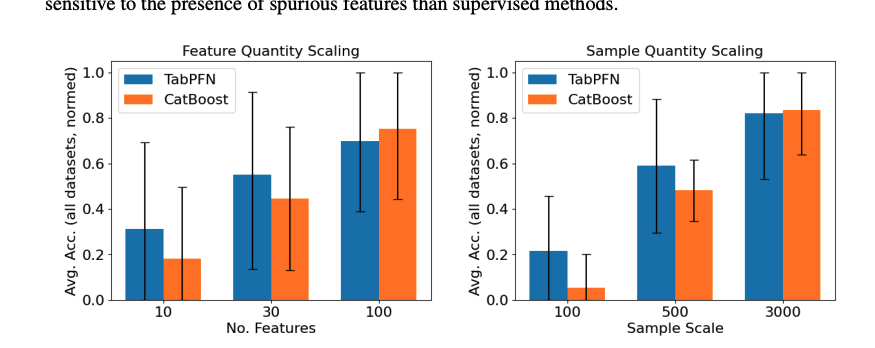

they compare the performance of tabpfn to catboost on popular datasets. They find that when the data is small, tabpfn does very well. Of course when you scale the data up, catboost takes over. Pretty much what you would expect given that tabpfn is prefitted and can benefit from transfer learning; this is especially true when the training data is small.

Interestingly they chose to only compare tabpfn to catboost and even cite a paper that found catboost to be the best. In kaggle competitions catboost is now king for tabular data, I don't need a paper to know that. But it is nice to see it backed up by some actual research

Many people that are not on kaggle use xgboost or lightgbm, which do well, but I never got xgboost to perform as well as catboost even with hyperparameter tuning. So the above paper comparing catboost to tabpfn is valid based on my understanding of the state of the art. In other words, if tabpfn beats catboost on small data, it will beat the other ones as well. This implies that tabpfn is really something special, especially with small datasets.

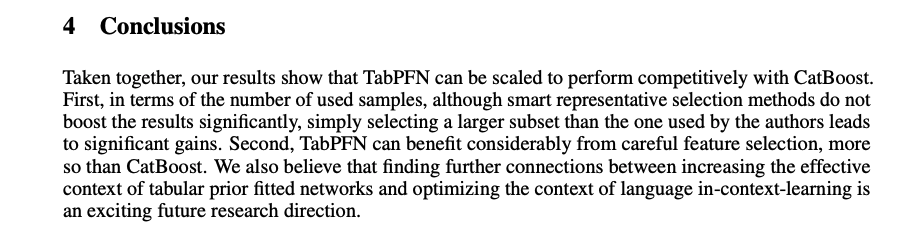